In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
directory = r'eval_data\retrieval_recall_results'

# Preparing to read all JSON files and extract relevant data
data_350_50 = []
data_700_50 = []
# Loop through the files in the directory
for file_name in os.listdir(directory):
    if file_name.endswith(".json") and ('faiss_350_50' in file_name or 'faiss_700_50' in file_name):
        with open(os.path.join(directory, file_name), 'r') as file:
            data = json.load(file)
            
            # Extracting model name and clean status from file name
            parts = file_name.split('_')
            start_idx = parts.index('50')+1
            try:
               end_idx = parts.index('not-cleaned-notebook-contents-v1.json')
            except:
                end_idx = parts.index('cleaned-notebook-contents-v1.json')
            model_name = '_'.join(parts[start_idx:end_idx])
            is_clean = not 'not-' in file_name

            # Storing recall scores along with model name and clean status
            entry = {
                'model': model_name,
                'clean': is_clean,
                'recall@1': data['recall@1'],
                'recall@3': data['recall@3'],
                'recall@5': data['recall@5'],
                'recall@10': data['recall@10']
            }
    if 'faiss_350_50' in file_name:
        data_350_50.append(entry)
    elif 'faiss_700_50' in file_name:
        data_700_50.append(entry)

In [6]:
def plot_recall_metrics(ax, data_json, name_data_json, clean=True):
    data_df = pd.DataFrame(data_json)
    unique_models = data_df['model'].unique()
    model_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_models)))
    recall_metrics = ['recall@1', 'recall@3', 'recall@5', 'recall@10']

    bar_width = 0.15
    index = np.arange(len(recall_metrics))

    for i, metric in enumerate(recall_metrics):
        for j, model in enumerate(unique_models):
            model_data = data_df[(data_df['model'] == model) & (data_df['clean'] == clean)]
            ax.bar(
                index[i] + j * bar_width,
                model_data[metric].values[0],
                bar_width,
                color=model_colors[j]
            )

            ax.text(
                index[i] + j * bar_width,
                model_data[metric].values[0] + 2,
                f'{model_data[metric].values[0]:.1f}',
                ha='center',
                va='bottom'
            )

    ax.legend(unique_models, title='Models', loc='upper left')
    ax.set_xlabel('Recall @')
    ax.set_ylabel('Recall Values')
    title = f'Recall @ for Different Models ({name_data_json})'
    if clean:
        title += ' after cleaning'
    else:
        title += ' not cleaned'
    ax.set_title(title)
    ax.set_xticks(index + bar_width * (len(unique_models) - 1) / 2)
    ax.set_xticklabels(recall_metrics)
    ax.set_ylim(0, 100)


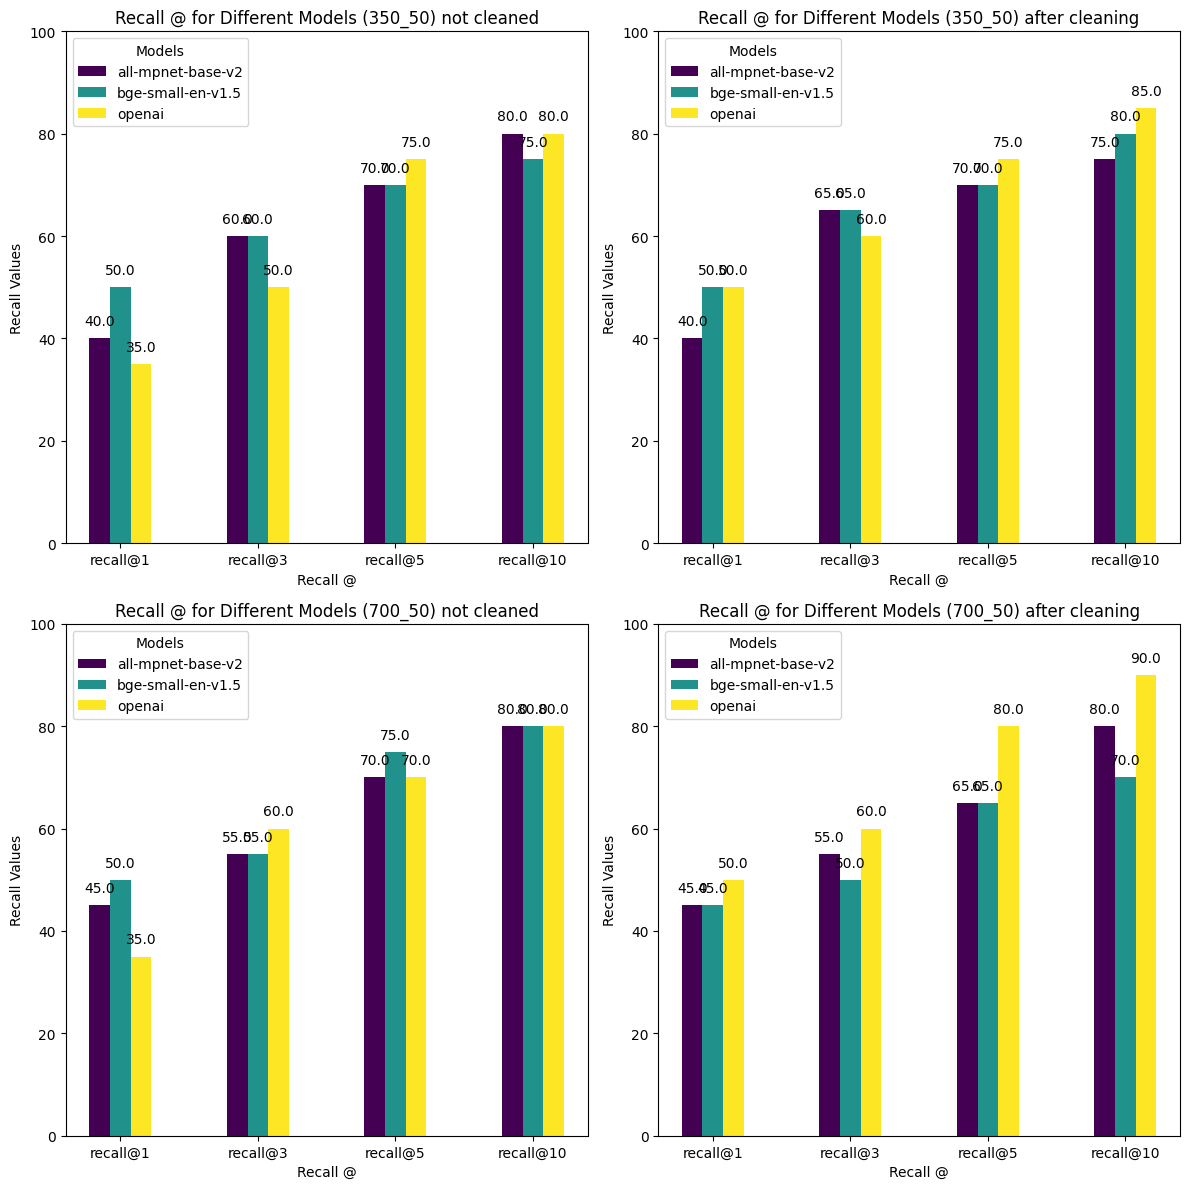

In [9]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1)
plot_recall_metrics(ax1, data_350_50, '350_50', clean=False)

ax2 = fig.add_subplot(2, 2, 2)
plot_recall_metrics(ax2, data_350_50, '350_50', clean=True)

ax3 = fig.add_subplot(2, 2, 3)
plot_recall_metrics(ax3, data_700_50, '700_50', clean=False)

ax4 = fig.add_subplot(2, 2, 4)
plot_recall_metrics(ax4, data_700_50, '700_50', clean=True)
plt.tight_layout()
plt.show()
